# Analytic Report and Research Proposal

## Data description

We have the client data obtained via IBM Watsom from telecommunication companies. We have 7043 rows - unique client IDs - and 21 columns describing demographic characteristics of the customers, services used, payment patterns and their churn status. 

The dataset can be used to identify cutomer segments who are prone to churn, as well as to get the insights on how various groups of customers use telecommuntication services. Also, this data can be used to identify the services that bring more value to the company.

Unfortunately, we don't have the information on the geographycal region where the data was gathered. The insights of the analysis could be extensively used to characterise the telecom market in that location and serve as a basis for further recommendations to the telecom companies. 

### The scope of the analysis

We'll focus primarily on solving 3 business problems: 
1. Is there a particular segment where the company could focus their efforts on to maximaze the value of every client? 
2. How can we decrease churn and extend client's life expectancy?
3. What are the services that the company should focus their efforts on to increase the spend of clients and serve the most valuabele clients better?
    
Based on the data we have, to help resolve these business questions we'll focus on answering the following questions in our data analysis: 
- Who are the users who spend the most with the company? Do they have any commonalities in their demographical data?
- Who are the customers who tend to churn? Are there any commonalities between them that can help predict the churn?
- What are the services used by top 25% of the clients and how do these clients behave?


In [142]:
#We'll import all the neccessary libraries at start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing our dataset
df=pd.read_csv("../../Telco_churn_data.csv")

#Understanding what kind of information we have at hand
list(df.columns.values)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Before stating specific questions and exploring the dataset, we'll start with unifying the fomatting of some columns. 

In [143]:
df.head(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [144]:
#Formatting SeniorCitizen column into understandable text
df.SeniorCitizen.replace([1, 0], ['Yes', 'No'], inplace=True)

## 1. Who are the users who spend the most with the company?

We'll group all the customers by their demographical data (Gender, Relationship status, etc) and see who are the client who spend the most with the company both money-wise and time-wise. 

In [145]:
df.groupby('Partner').mean()

,tenure,MonthlyCharges
Partner,,
No,23.357869,61.945001
Yes,42.017637,67.776264


In [146]:
df.groupby('Dependents').mean()

,tenure,MonthlyCharges
Dependents,,
No,29.806000,67.002808
Yes,38.368246,59.522156


In [147]:
df.groupby('gender').mean()

,tenure,MonthlyCharges
gender,,
Female,32.244553,65.204243
Male,32.495359,64.327482


In [148]:
df.groupby('SeniorCitizen').mean()

,tenure,MonthlyCharges
SeniorCitizen,,
No,32.192171,61.847441
Yes,33.295972,79.820359


Looking at the significant differences in the results, we can say that clients with partners tend to stay almost twice as much time with the same company as the signles. People with partners and dependents, and also senior people tend to spend much more on telecommunications.  Gender doesn't really help us draw a line between the groups, since the means' difference is insignificant. 

In [149]:
df.groupby(['SeniorCitizen','Partner','Dependents', 'gender']).mean()
# ? Can I sort by MonthlyCharges this table?

tenure  MonthlyCharges
SeniorCitizen Partner Dependents gender                           
No            No      No         Female  22.962631       61.297720
                                 Male    22.892107       58.981282
                      Yes        Female  22.042254       55.201408
                                 Male    25.137441       49.825355
              Yes     No         Female  43.315436       69.961913
                                 Male    43.975309       73.530423
                      Yes        Female  40.604265       59.016351
                                 Male    41.574209       60.756265
Yes           No      No         Female  24.892744       78.362145
                                 Male    25.434426       74.903074
                      Yes        Female  21.333333       92.550000
                                 Male    22.600000       65.140000
              Yes     No         Female  42.334928       85.157895
                                 Male    39.145907       80.964947
                      Yes        Female  44.256410       80.869231
                                 Male    49.454545       84.802273

Interestingly enough, when we split groups by all the considered criteria, we see that:
- Elderly females with dependents and without partners spend on average much more of what males spend in the same situation (93 vs 65) and are the most "profitable" clients for the company
- Elderly men with partners and dependents are the longest clients of the company and on average spend quite a lot

Let's try to visualize this: 

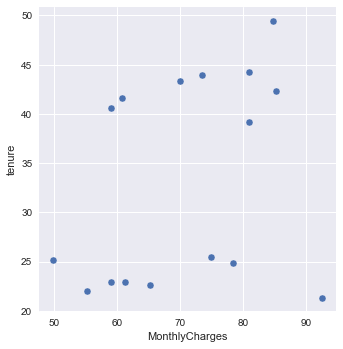

In [150]:
x = df.groupby(['SeniorCitizen','Partner','Dependents', 'gender']).mean()

sns.pairplot(x_vars=['MonthlyCharges'], y_vars=['tenure'], data=x, size=5)
# ? how to call the Keys on the plot: eg Senior Yes & Partner Yes or Female & Partner Yes, "hue?"

In [164]:
# here goes the conclusion about the plot

## 2. How can we decrease churn and extend client's life expectancy?

Plan:
Ideally - Probablity of churn based on all the characteristics. 

Realistically: 
- Separate dataframe into Churn / non-Churn
- Find the modes to see is there's are differences between Churn / non-Churn

In [151]:
#? How to fix this attribute error - apply method
# df.groupby('Churn').mode()

In [152]:
churning_clients = pd.DataFrame(df[df['Churn'] == 'Yes'])
non_churning_clients = pd.DataFrame(df[df['Churn'] == 'No'])

In [153]:
churning_clients.Contract.describe()

count               1869
unique                 3
top       Month-to-month
freq                1655
Name: Contract, dtype: object

In [154]:
non_churning_clients.Contract.describe()

count               5174
unique                 3
top       Month-to-month
freq                2220
Name: Contract, dtype: object

In [155]:
churning_clients.InternetService.describe() 

count            1869
unique              3
top       Fiber optic
freq             1297
Name: InternetService, dtype: object

In [156]:
non_churning_clients.InternetService.describe() 

count     5174
unique       3
top        DSL
freq      1962
Name: InternetService, dtype: object

In [157]:
# Ideally to compare churning and non-churning segments visually to build bar plots here:
# https://seaborn.pydata.org/generated/seaborn.barplot.html

In [165]:
ax = sns.barplot(x=df['InternetService'].values, y=df['InternetService'].value_counts, hue="Churn", data=df)

TypeError: float() argument must be a string or a number, not 'method'

## 3. What are the services used by top 25% of the clients and how do these clients behave?

From the business perspective we're interested to identify how the most profitable customer segment behaves and what king of services they use. We'll take the 25% top clients and conduct the descriptive analysis for this data slice.

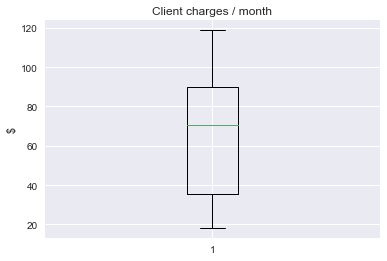

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [159]:
plt.boxplot(df['MonthlyCharges'])
plt.title('Client charges / month')
plt.ylabel('$')
plt.show() 

df['MonthlyCharges'].describe()

In [160]:
topclients = pd.DataFrame(df[df["MonthlyCharges"] > 89.85])

In [161]:
topclients.head(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,No,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,No,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,No,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,No,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
19,4183-MYFRB,Female,No,No,No,21,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.9,No
26,6467-CHFZW,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
28,5248-YGIJN,Male,No,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No


## Draft:

Let's understand if gender, relationship status or seniority will be defining in understanding our top clients. 

In [162]:
#Relationship Status
clientswithpartners = pd.DataFrame(topclients[topclients['Partner'] == 'Yes'])
clientswithoutpartners = pd.DataFrame(topclients[topclients['Partner'] == 'No'])

#Gender 
femaleclients = pd.DataFrame(topclients[topclients['gender'] == 'Female'])
maleclients = pd.DataFrame(topclients[topclients['gender'] == 'Male'])

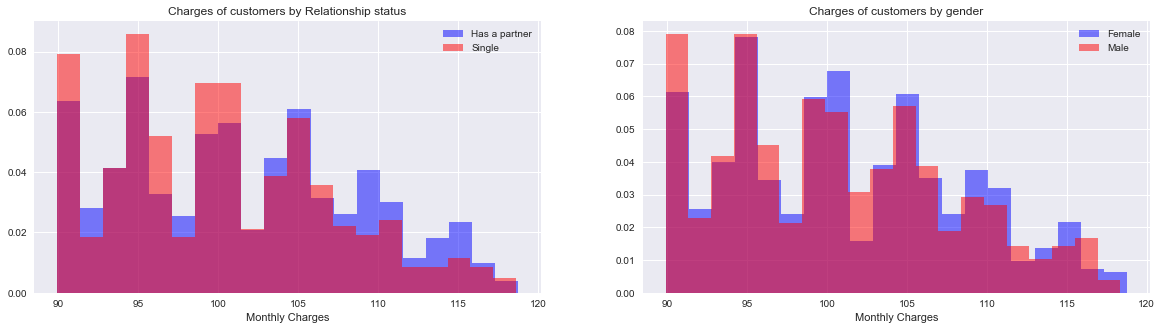

In [163]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(clientswithpartners['MonthlyCharges'], normed=True, color='blue', bins = 20, alpha=.5, label='Has a partner') 
plt.hist(clientswithoutpartners['MonthlyCharges'], normed=True, color='red', bins = 20, alpha=.5, label='Single')
plt.legend()
plt.title('Charges of customers by Relationship status')
plt.xlabel('Monthly Charges')

plt.subplot(1, 2, 2)
plt.hist(femaleclients['MonthlyCharges'], normed=True, color='blue', bins = 20, alpha=.5, label='Female') 
plt.hist(maleclients['MonthlyCharges'], normed=True, color='red', bins = 20, alpha=.5, label='Male')
plt.legend()
plt.title('Charges of customers by gender')
plt.xlabel('Monthly Charges')

plt.show()